# 3.2 Phân tích về các comments và nội dung các tiêu đề trong bài viết
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 3.2.1 Cài đặt thư viện và chuẩn bị dữ liệu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Data/GenshinImpact.vi_modified.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   post_url        123 non-null    object
 1   post_text       123 non-null    object
 2   time            123 non-null    object
 3   image           91 non-null     object
 4   video           12 non-null     object
 5   comments        123 non-null    int64 
 6   shares          123 non-null    int64 
 7   user_id         123 non-null    int64 
 8   comments_full   123 non-null    object
 9   reaction_count  123 non-null    int64 
 10  thích           123 non-null    int64 
 11  yêu thích       123 non-null    int64 
 12  haha            123 non-null    int64 
 13  wow             123 non-null    int64 
 14  thương thương   123 non-null    int64 
 15  buồn            123 non-null    int64 
 16  phẫn nộ         123 non-null    int64 
 17  posted_hour     123 non-null    int64 
dtypes: int64(1

## 3.2.2 Sự thay đổi số lượng comments theo thời gian

<Figure size 2000x1000 with 0 Axes>

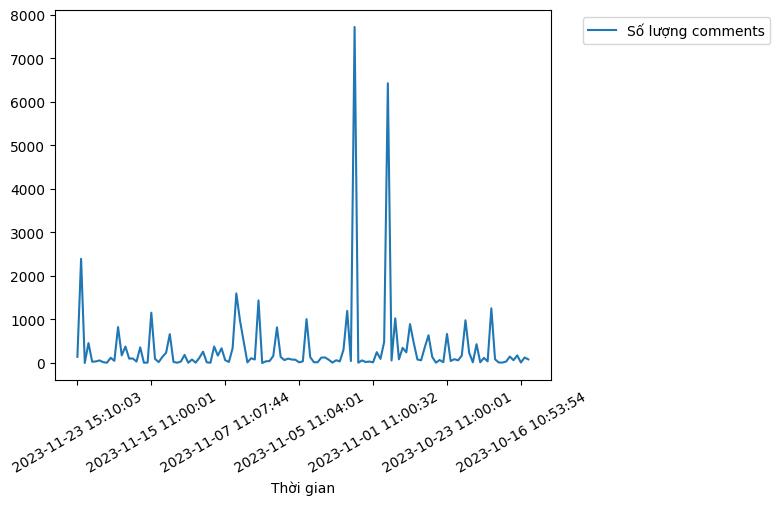

In [4]:
plt.figure(figsize=(20, 10))
df.plot(x='time', y='comments', label = "Số lượng comments")
plt.xlabel('Thời gian')
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [5]:
df_sorted = df.sort_values(by='comments', ascending=False)

In [6]:
print(f"Bài viết có lượng comments lớn nhất: {df_sorted.iloc[0]['post_url']}")

Bài viết có lượng comments lớn nhất: https://facebook.com/GenshinImpact.vi/posts/648593290761292


In [7]:
print(f"Bài viết có lượng comments lớn thứ hai: {df_sorted.iloc[1]['post_url']}")

Bài viết có lượng comments lớn thứ hai: https://facebook.com/GenshinImpact.vi/posts/646511644302790


## 3.2.3 Tương quan giữa số lượng comments và số lượng reactions

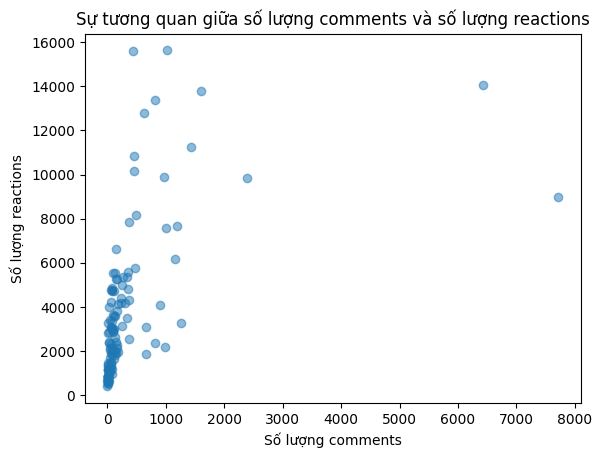

In [8]:
# Vẽ biểu đồ scatter plot
plt.scatter(df['comments'], df['reaction_count'], alpha=0.5)
plt.title('Sự tương quan giữa số lượng comments và số lượng reactions')
plt.xlabel('Số lượng comments')
plt.ylabel('Số lượng reactions')
plt.show()

## 3.2.4 Tìm kiếm tên nhân vật được nhắc đến nhiều nhất (trong các bình luận/ trong tiêu đề các bài viết)

### 3.2.4.1 Thu dữ liệu

In [9]:
data = {'names': ["Albedo", 
                  "Alhaitham", 
                  "Aloy", 
                  "Amber", 
                  "Arataki Itto",
                  "Baizhu", 
                  "Barbara", 
                  "Beidou", 
                  "Bennett",
                  "Candace",
                  "Charlotte",
                  "Chongyun",
                  "Collei",
                  "Cyno",
                  "Dehya",
                  "Diluc",
                  "Diona",
                  "Dori",
                  "Eula",
                  "Faruzan",
                  "Fischl",
                  "Freminet",
                  "Furina",
                  "Ganyu",
                  "Gorou",
                  "Hu Tao",
                  "Jean",
                  "Kazuha",
                  "Kaeya",
                  "Ayaka",
                  "Ayato",
                  "Kaveh",
                  "Keqing",
                  "Kirara",
                  "Klee",
                  "Sara",
                  "Kuki",
                  "Layla",
                  "Lisa",
                  "Lynette",
                  "Lyney",
                  "Mika",
                  "Mona",
                  "Nahida",
                  "Neuvillette",
                  "Nilou",
                  "Ningguang",
                  "Noelle",
                  "Qiqi",
                  "Raiden Shogun",
                  "Razor",
                  "Rosaria",
                  "Kokomi",
                  "Sayu",
                  "Shenhe",
                  "Heizou",
                  "Sucrose",
                  "Tartaglia",
                  "Thoma",
                  "Tighnari",
                  "Aether",
                  "Lumine",
                  "Venti",
                  "Kẻ Lang Thang",
                  "Wriothesley",
                  "Xiangling",
                  "Xiao",
                  "Xingqiu",
                  "Xinyan",
                  "Yae Miko",
                  "Yanfei",
                  "Yaoyao",
                  "Yelan",
                  "Yoimiya",
                  "Yun Jin",
                  "Zhongli",
                  "Paimon"]}
character_df = pd.DataFrame(data)

### 3.2.4.2 Nhân vật được nhắc đến nhiều trong các bình luận

In [10]:
import re

# Định nghĩa mẫu regex để tìm kiếm chuỗi cần trích xuất
pattern = re.compile(r'\'comment_text\': \'(.*?)\'')

# Áp dụng hàm findall để trích xuất tất cả các chuỗi từ cột 'comment_full'
df['comment_text_extracted'] = df['comments_full'].apply(lambda x: pattern.findall(str(x)))

comments_text = df['comment_text_extracted'].to_string(index=False, header=False)
lowercased_comments_text = comments_text.lower()
print(lowercased_comments_text)

[tìm luck roll ayato💦😭☺, trường tiến nè, trần đ...
[anh pham, trần lem ngon, chuẩn bị cạp đít..., ...
                                             [:>>]
[khánh uyên đá đì ngol z, chúc mừng sinh nhật a...
[chắc có mỗi tôi thực sự thích chơi bài dù chơi...
[chồng snvvvv, happy birthday anh iu❤🔥, chúc mừ...
[cảm ơn team hoyoverse và mọi người 🥰🥰, đỉnh xh...
[ngọc vy lệch cây kiếm ayato ra cây mái chèo t ...
                                                []
[event này cho tầm bn roll v mn 😢, hưng nguyễn ...
[mê chiếc nhạc của charlotte quá đyyyy, trần hu...
[món thích nhất là mochi mâm xôi\nuid: 80153789...
[vấn cứu đc trấn furina r =))), u là chòi, chưa...
[ewww xinh vaiz e ơi😭😭, xinh quá chồng ơi, vợ x...
[chúc mừng sn vợ iu ❤ ❤, hpbd mèo điện cutii🫶🏻,...
[pen ika cuti ác, autumn chang cutiii, 3 ae cut...
[xin người, cái điệu nhạc, điệu múa và giọng nó...
[mong game thắng giải nhá, mong game thắng giải...
                                              [fc]
[đạt vịt giữ vững phong độ chúa

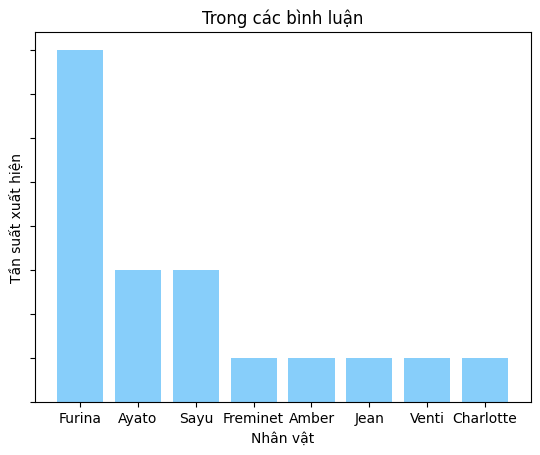

In [11]:
# Tạo một cột mới trong DataFrame để lưu trữ số lần xuất hiện của mỗi tên
character_df['mention_count'] = character_df['names'].apply(lambda name: lowercased_comments_text.count(name.lower()))
# Sắp xếp DataFrame theo cột 'mention_count' giảm dần
df_sorted = character_df.sort_values(by='mention_count', ascending=False)

# Lọc chỉ những giá trị khác 0
df_sorted_nonzero = df_sorted[df_sorted['mention_count'] != 0]

# Hiển thị biểu đồ
plt.bar(df_sorted_nonzero['names'], df_sorted_nonzero['mention_count'], color='lightskyblue')
plt.xlabel('Nhân vật')
plt.ylabel('Tần suất xuất hiện')
plt.title('Trong các bình luận')

# Tắt mốc đếm trục y
plt.tick_params(axis='y', labelleft=False)

plt.show()

### 3.2.4.3 Nhân vật được nhắc đến nhiều trong tiêu đề các bài viết

In [12]:
post_text = df['post_text'].to_string(index=False, header=False)
lowercased_post_text = post_text.lower()
print(lowercased_post_text)

bản tin sự kiện phiên bản 4.2 "vũ điệu của tội ...
nhà lữ hành thân mến, sự kiện cầu nguyện "tà dư...
[công bố kết quả] sự kiện thu thập fan art "nhà...
chúc mừng sinh nhật, wriothesley!\n\nđã lâu khô...
thất thánh triệu hồi - chế độ nhiệt huyết: đội ...
chúc mừng sinh nhật, wriothesley!\n\n"là y tá t...
một phiên bản tuyệt vời! cám ơn vac - voice act...
[sự kiện có thưởng] sự kiện thu thập fan art "p...
[sự kiện có thưởng] sự kiện thu thập fan art tr...
hướng dẫn cách chơi "chuyến thám hiểm kỳ ảo của...
woa, ánh sáng này thật tuyệt! nào, mau tạo dáng...
tiệc ngọt cùng furina\n\n"nhà lữ hành, có muốn ...
sự kiện "chuyến thám hiểm kỳ ảo của thelxie": t...
chúc mừng sinh nhật, keqing!\n\nphù... quả nhiê...
chúc mừng sinh nhật, keqing!\n\n"cái này được đ...
[genshin impact] ra mắt sticker - tranh của pai...
[genshin impact] hoạt cảnh - màn kết của tội nh...
genshin impact được đề cử "best ongoing game" t...
[công bố kết quả] sự kiện thu thập sticker melu...
[genshin impact] hoạt cảnh - th

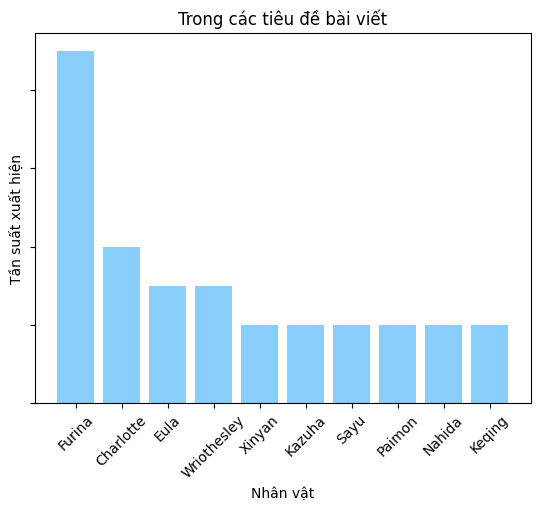

In [13]:
# Tạo một cột mới trong DataFrame để lưu trữ số lần xuất hiện của mỗi tên
character_df['mention_count'] = character_df['names'].apply(lambda name: lowercased_post_text.count(name.lower()))
# Sắp xếp DataFrame theo cột 'mention_count' giảm dần
df_sorted = character_df.sort_values(by='mention_count', ascending=False)

# Lọc chỉ những giá trị khác 0
df_sorted_nonzero = df_sorted[df_sorted['mention_count'] != 0]

# Hiển thị biểu đồ
plt.bar(df_sorted_nonzero['names'], df_sorted_nonzero['mention_count'], color='lightskyblue')
plt.xlabel('Nhân vật')
plt.ylabel('Tần suất xuất hiện')
plt.title('Trong các tiêu đề bài viết')
plt.xticks(rotation = 45)

# Tắt mốc đếm trục y
plt.tick_params(axis='y', labelleft=False)

plt.show()

## 3.2.5 Các từ ngữ nổi bật (Trong Tiêu đề bài viết/ Trong các bình luận)

### 3.2.5.1 Các từ ngữ nổi bật trong các bình luận

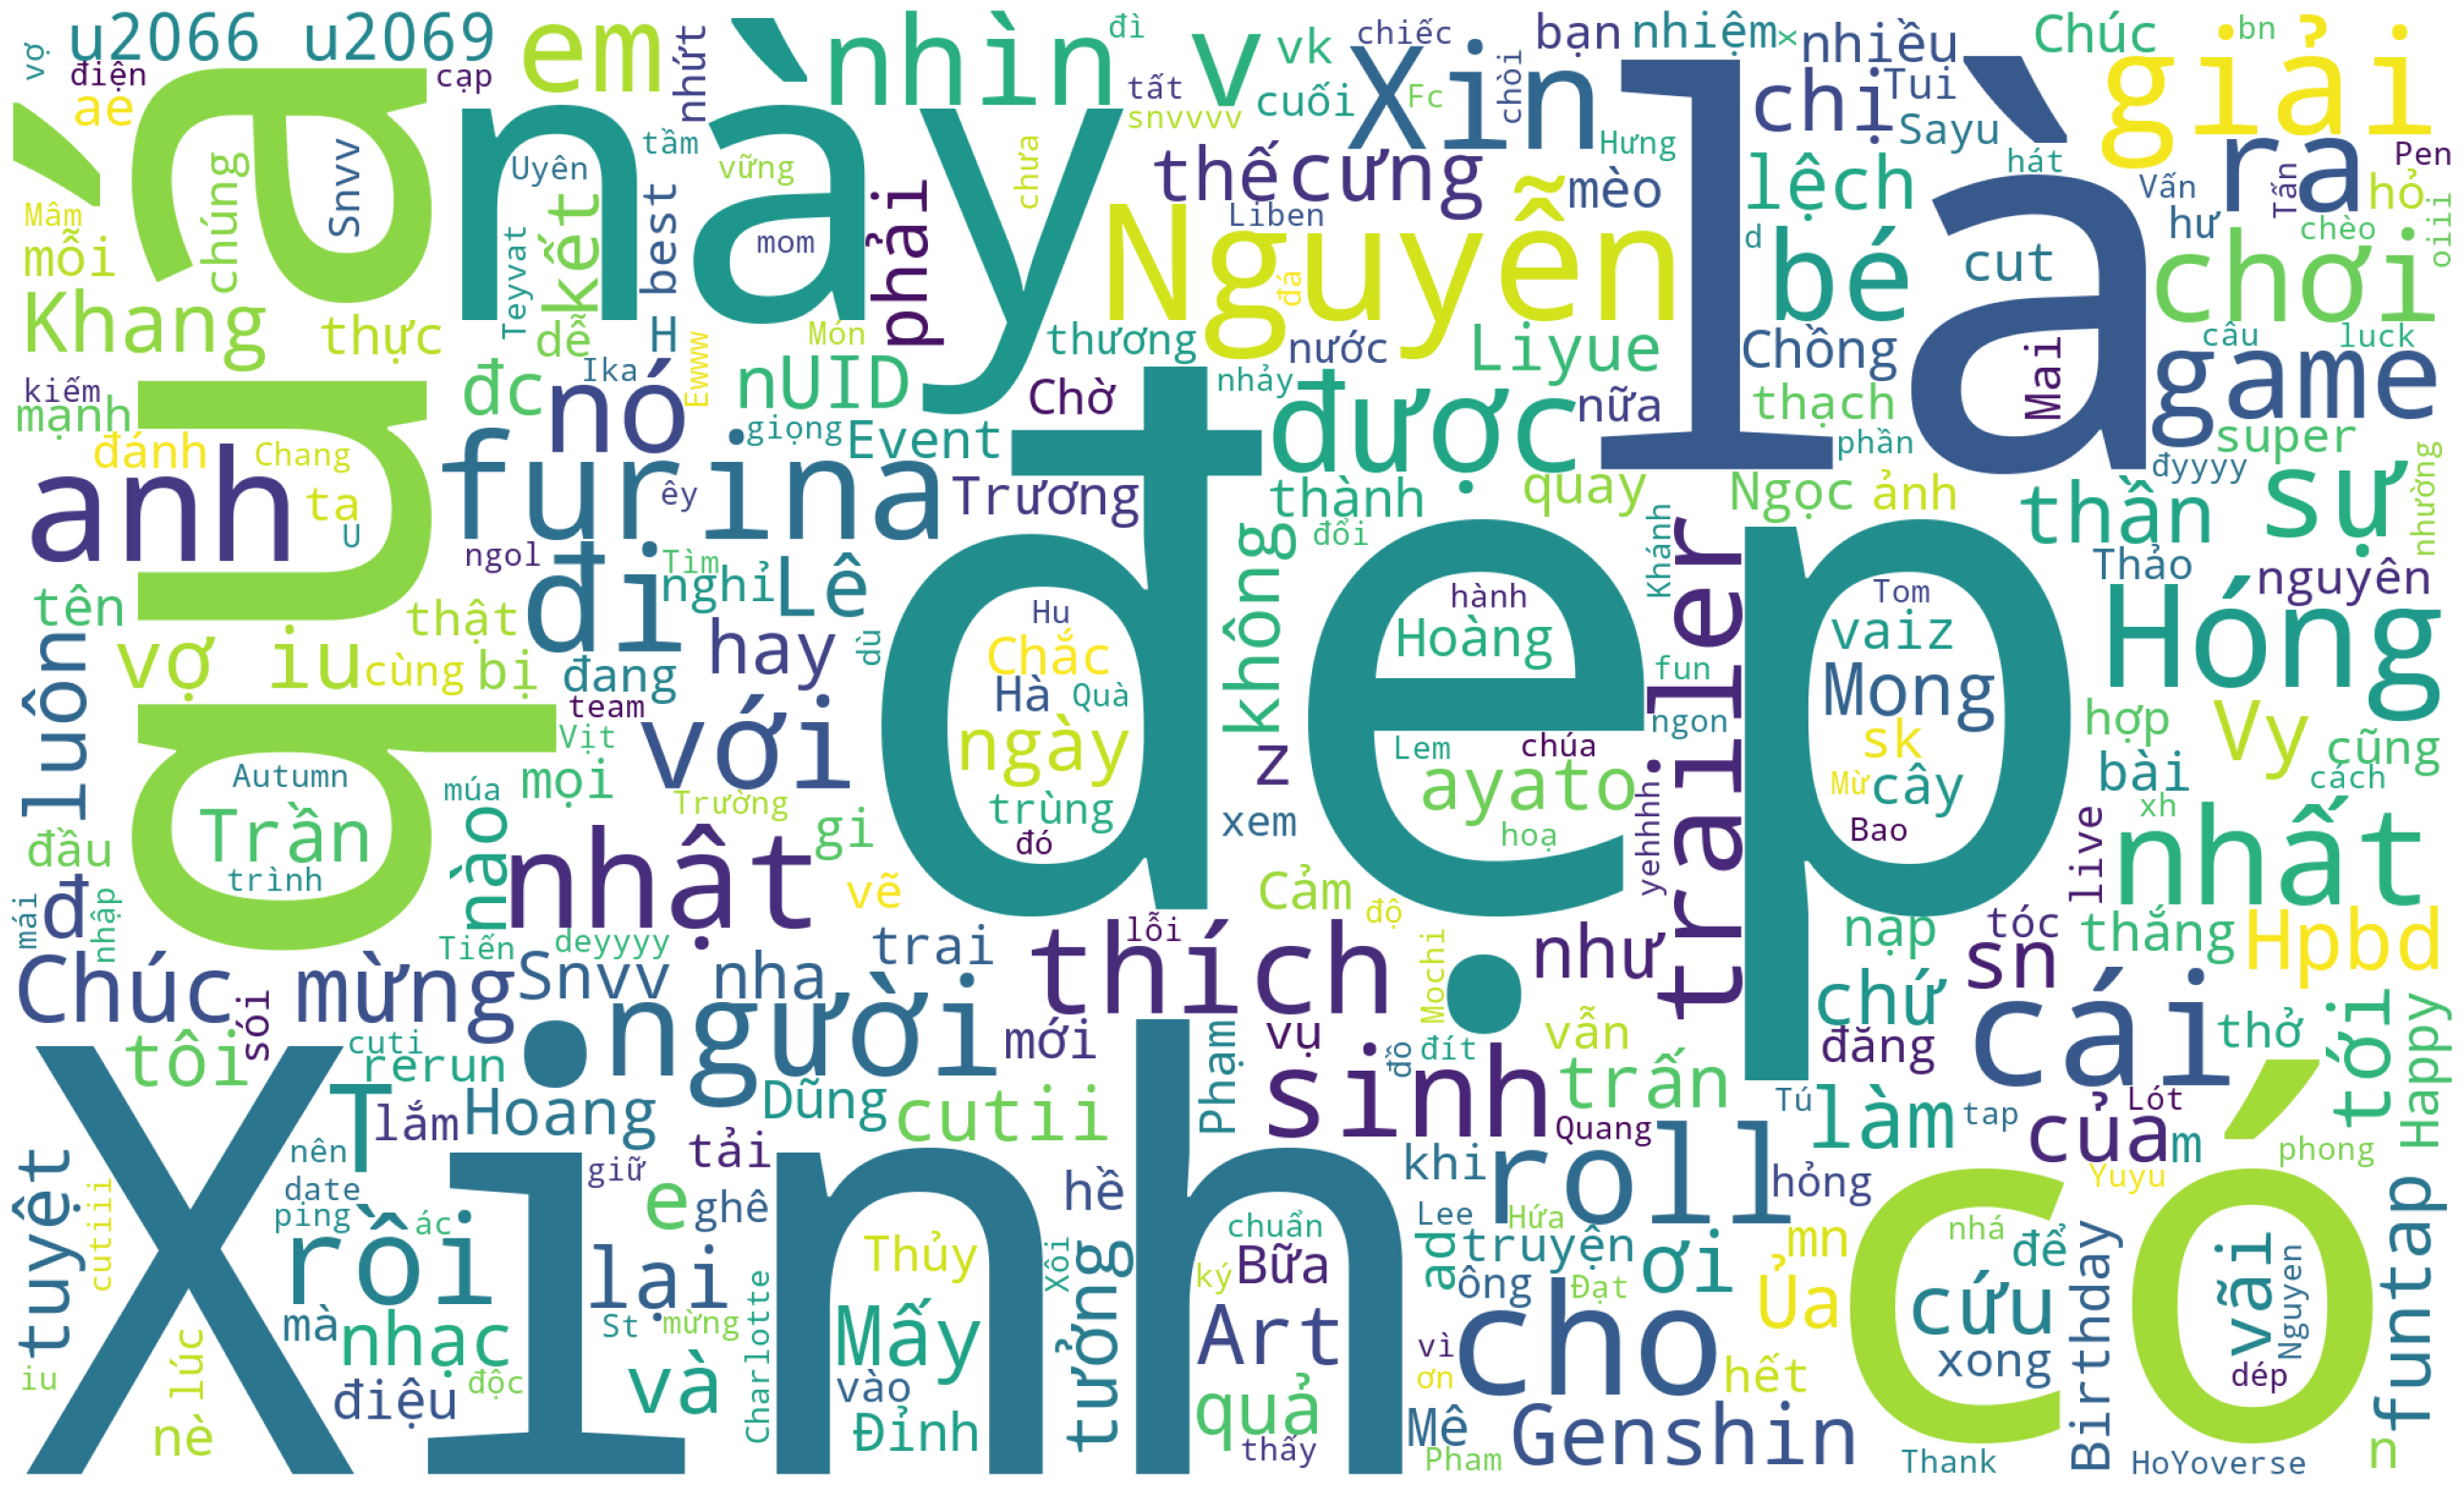

In [14]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(comments_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 3.2.5.2 Các từ ngữ nổi bật trong các tiêu đề bài viết

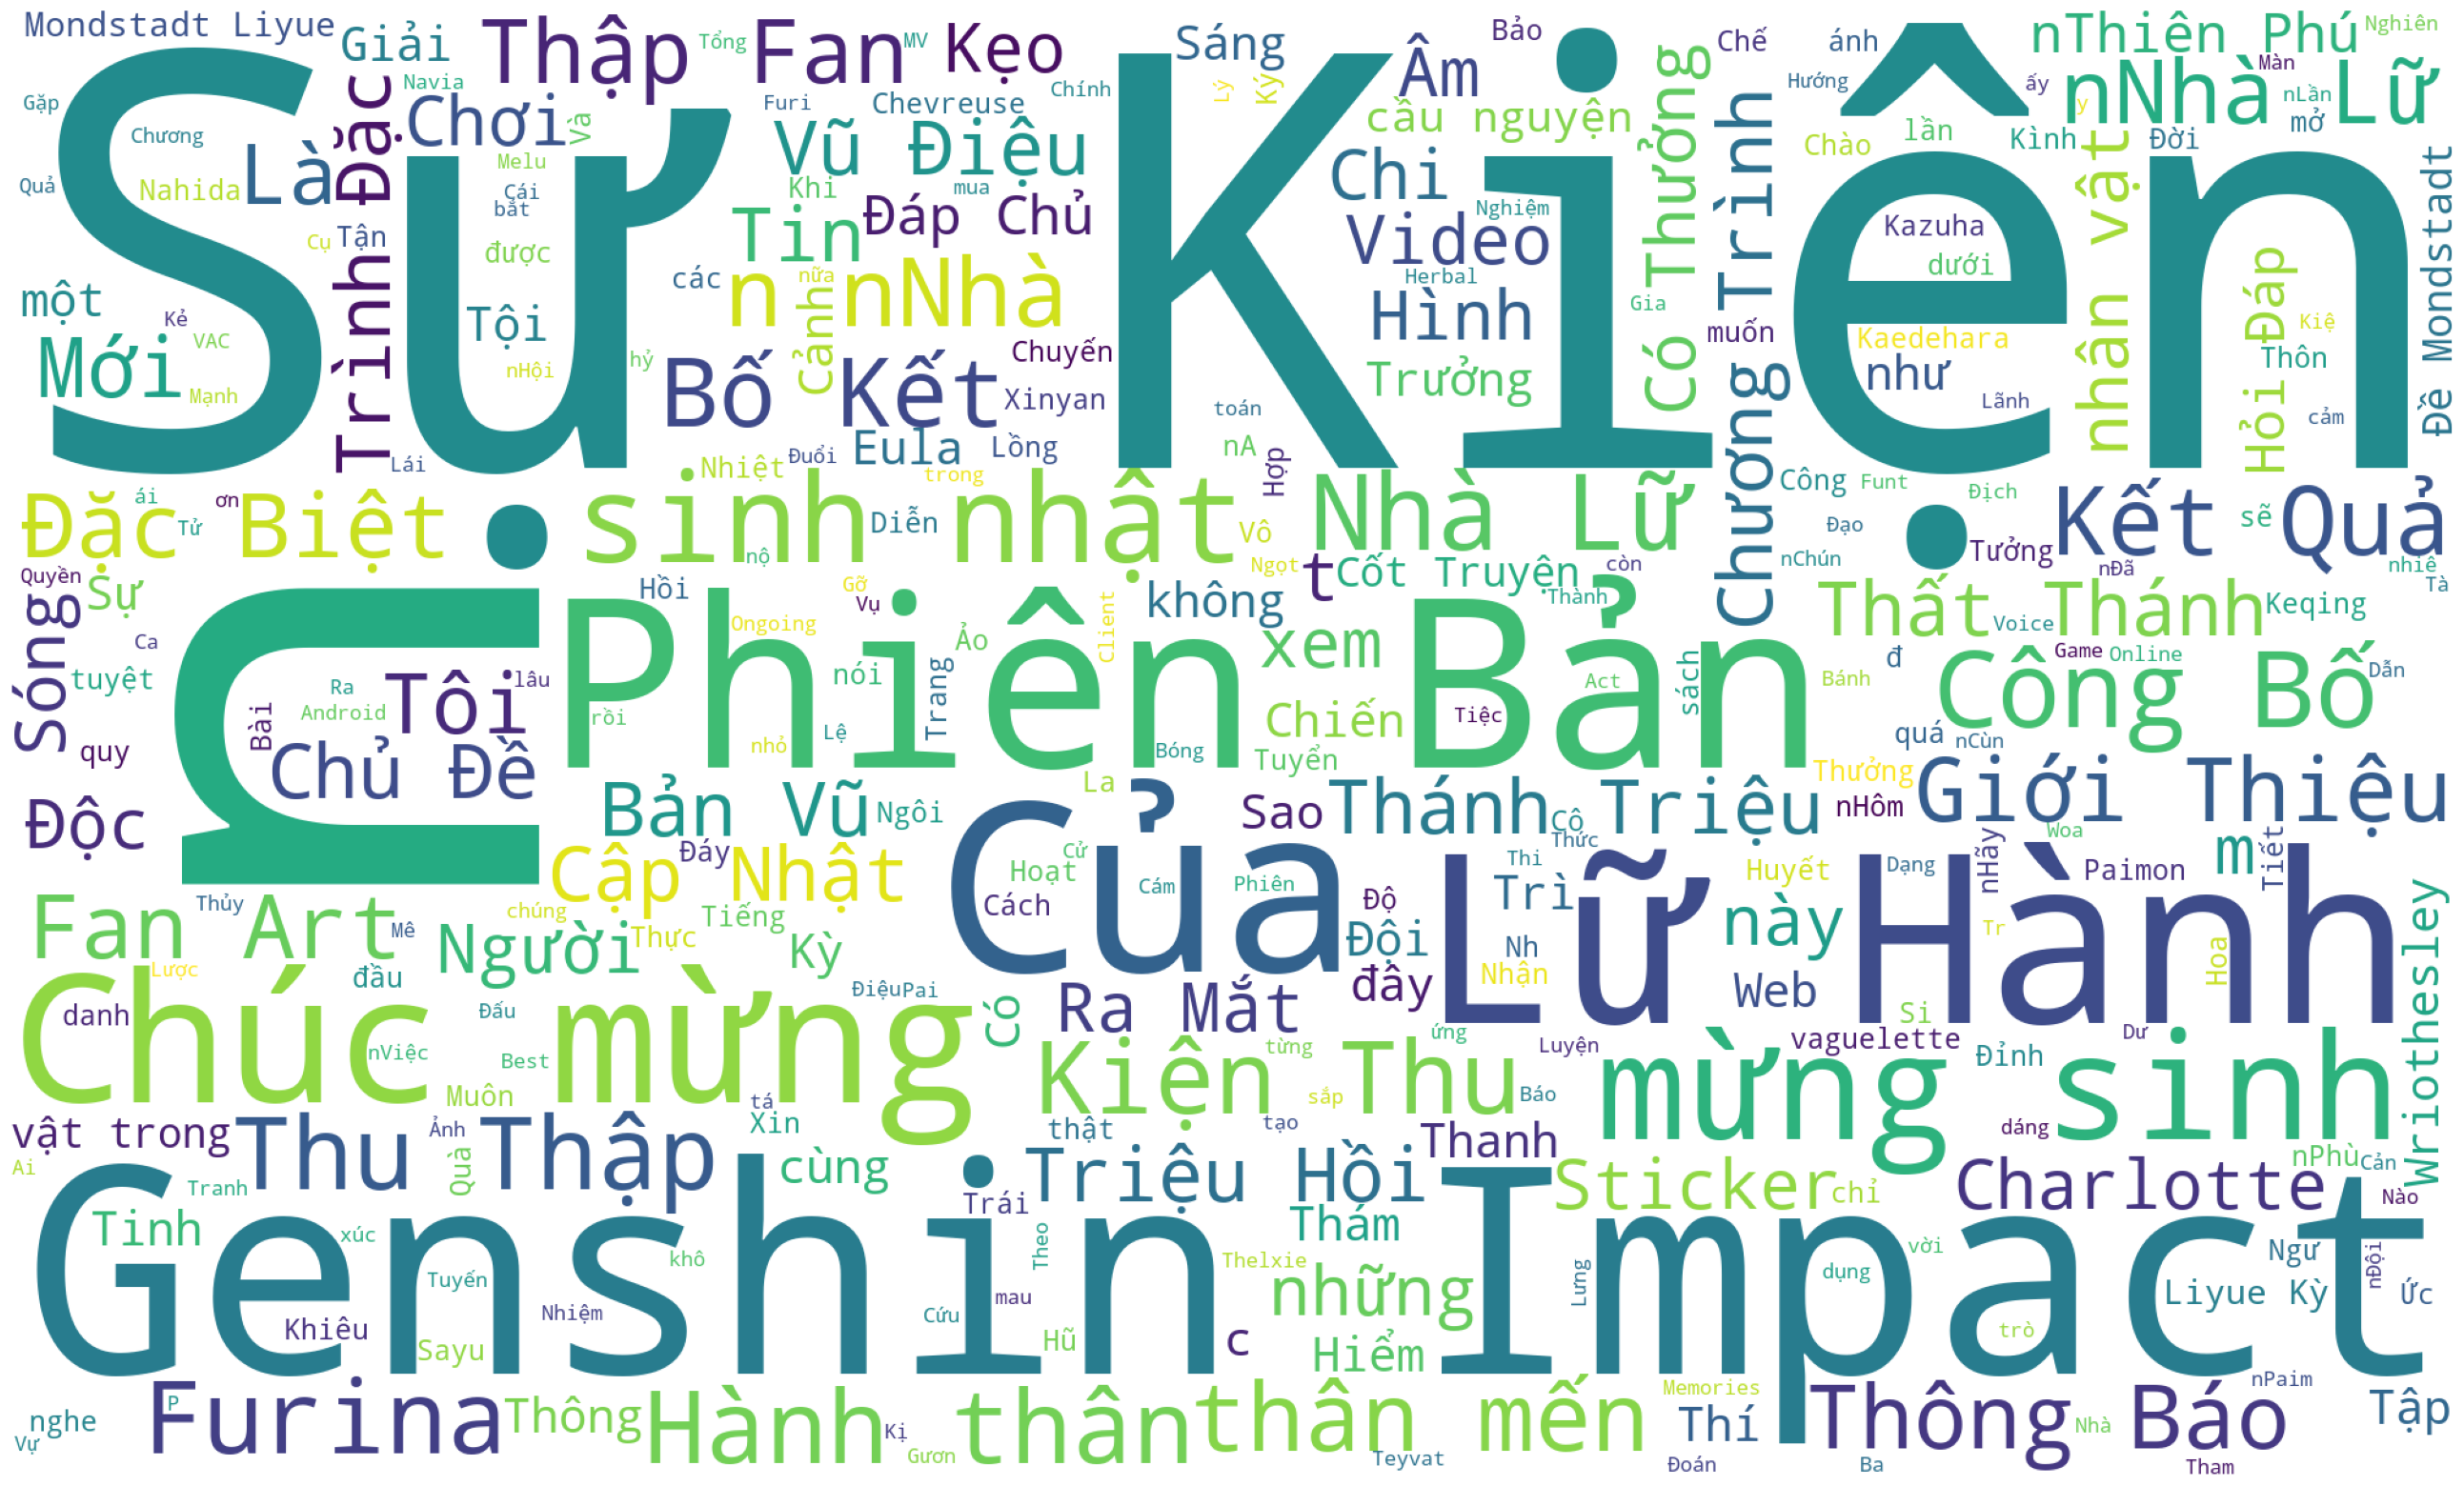

In [15]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(post_text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()